In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

Constants

In [2]:
c = 3 * 10**8  # speed of light in m/s
k_B = 1.38 * 10**-23  # Boltzmann constant in J/K
earth_radius_km = 6371  # Radius of Earth in kilometers

Functions

In [3]:
# Functions
def calculate_slant_range(earth_radius_km, satellite_height_km, elevation):
    elevation_rad = math.radians(elevation)
    effective_radius = earth_radius_km + satellite_height_km
    slant_range = effective_radius * (1 / math.sin(elevation_rad))
    return slant_range

def calculate_free_space_loss(S, f):
    Ls = 20 * math.log10(c / (4 * math.pi * S * f))
    return Ls

def calculate_antenna_gain(D, f, eta):
    lambda_ = c / f
    G = (math.pi * D / lambda_)**2
    G_db = 10 * math.log10(eta * G)
    return G_db

def calculate_pointing_loss(theta_p, f, D):
    theta_3dB = 21 / (f / 10**9 * D)
    Lp = -12 * (theta_p / theta_3dB)**2
    return Lp

def calculate_system_noise_temperature(T):
    Ts_dBi = 10 * math.log10(T)
    return Ts_dBi

def calculate_boltzmann_constant():
    k_B_dBi = 10 * math.log10(k_B)
    return k_B_dBi

def calculate_data_rate(Power, SNR_required, margin, L_imp, L_a, G_t_net, Gr_net, Ls, k_B_dBi, Ts_dBi):
    R_dB = Power - (SNR_required + margin) + L_imp + L_a + G_t_net + Gr_net + Ls - k_B_dBi - Ts_dBi
    data_rate_bps = 10**(R_dB / 10)
    return R_dB, data_rate_bps

Inputs

In [4]:
# Parameters
f = 2.1 * 10**9 #Link Frequency
D_r = 1 #Reciever Antenna Diameter Size (m)
eta_r = 0.55 #Efficiency of Reciever
theta_pr = 0.001 #Reciever pointing accuracy (degree)
T = 135 #System Noise Temperature (K)
D_t = 1 #Diameter of transmitter (m)
eta_t = 0.55 #Efficiency of Transmitter
theta_pt = 1 #Transmitter pointing accuracy (degree)
G_t = 50 #Transmitter Gain
SNR_required = 10 #Required Signal to Noise Ratio
margin = 3 #Margin
misc_losses = 0 #Losses
L_l = 1.96 #Line Loss
L_imp = 0.3 #Losses
L_a = 0.3 #Losses
Power = 18.65 # Transmitter Power (dBW)
satellite_height_km = 500  # Orbit height in kilometers
# Simulation
time_steps = np.linspace(0, 1000, 500)  # THS IS WHERE KARENS TIME SERIES GOES! NEED TO HAVE INPUTS AND TAKE APPROPRIATE COLUMNS HERE
elevations = np.linspace(1, 180, 250)
azimuth = 135  # Constant azimuth

slant_ranges = []
data_rates = []

k_B_dBi = calculate_boltzmann_constant()
Ts_dBi = calculate_system_noise_temperature(T)

Calculating and Plotting

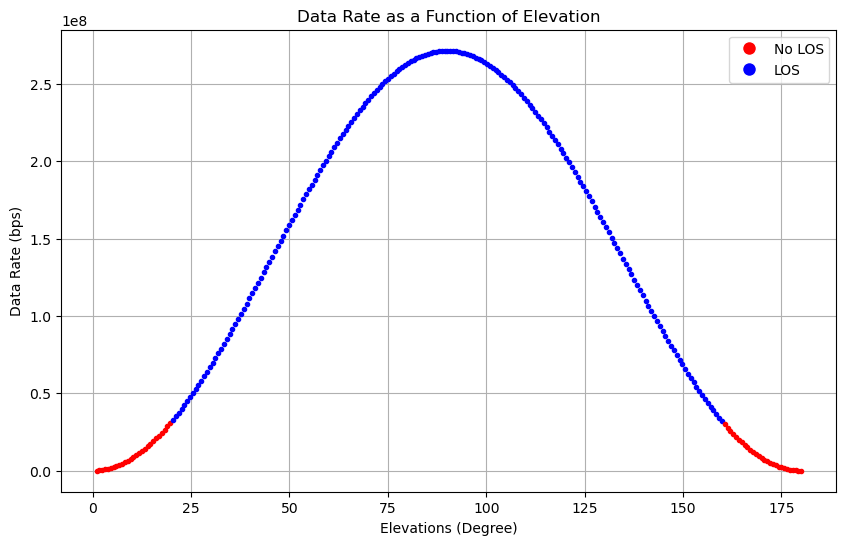

In [5]:
for elevation in elevations:
    S = calculate_slant_range(earth_radius_km, satellite_height_km, elevation) * 1000  # in meters
    Ls = calculate_free_space_loss(S, f)
    Gr_db = calculate_antenna_gain(D_r, f, eta_r)
    Lp_r = calculate_pointing_loss(theta_pr, f, D_r)
    Gr_net = Gr_db + Lp_r
    Lp_t = calculate_pointing_loss(theta_pt, f, D_t)
    G_tp = calculate_antenna_gain(D_t, f, eta_t)
    G_t_net = G_tp + Lp_t - L_l
    R_dB, data_rate_bps = calculate_data_rate(Power, SNR_required, margin, L_imp, L_a, G_t_net, Gr_net, Ls, k_B_dBi, Ts_dBi)
    
    slant_ranges.append(S)
    data_rates.append(data_rate_bps)

# Plotting
plt.figure(figsize=(10, 6))

for i, elevation in enumerate(elevations):
    if elevation < 20 or elevation > 160:
        plt.plot(elevation, data_rates[i], 'r.')
    else:
        plt.plot(elevation, data_rates[i], 'b.')

# Create legend
red_patch = plt.Line2D([0], [0], marker='o', color='w', label='No LOS', markerfacecolor='r', markersize=10)
blue_patch = plt.Line2D([0], [0], marker='o', color='w', label='LOS', markerfacecolor='b', markersize=10)
plt.legend(handles=[red_patch, blue_patch])

plt.xlabel('Elevations (Degree)')
plt.ylabel('Data Rate (bps)')
plt.title('Data Rate as a Function of Elevation')
plt.grid(True)
plt.show()